In [53]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader

# For time stamps
from datetime import datetime


Let's use Yahoo and pandas to grab some data for some tech stocks.

In [54]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [55]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [57]:
GOOG.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,699.455682,705.864305,692.140097,699.080159,2138125.396825,699.080159
std,45.598533,45.065700,46.069278,45.663521,1024082.894074,45.663521
min,573.000000,599.330017,565.049988,582.059998,527200.000000,582.059998
25%,661.742523,666.955002,654.292496,662.009979,1511425.000000,662.009979
50%,709.565002,718.247498,703.170013,710.820007,1864600.000000,710.820007
75%,731.582519,739.112488,727.418762,734.437515,2353775.000000,734.437515
max,784.500000,789.869995,766.900024,776.599976,6653900.000000,776.599976


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-07-14 to 2016-07-13
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


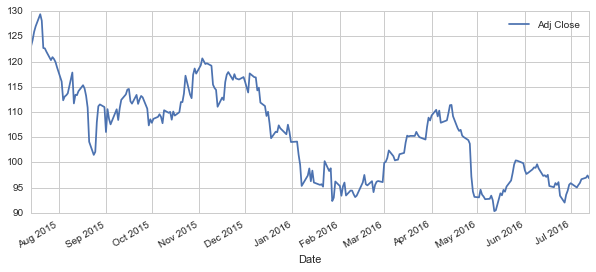

In [8]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

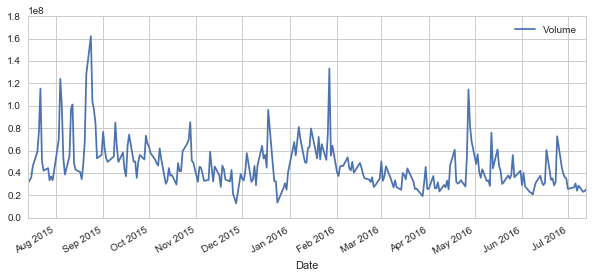

In [9]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [10]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

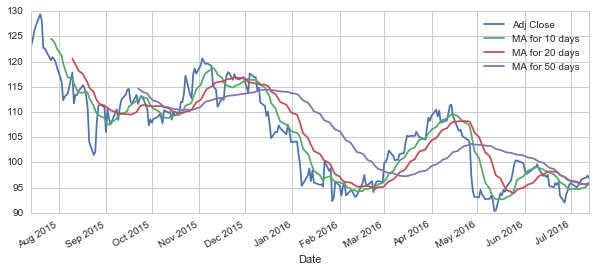

In [11]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,legend=True,figsize=(10,4))

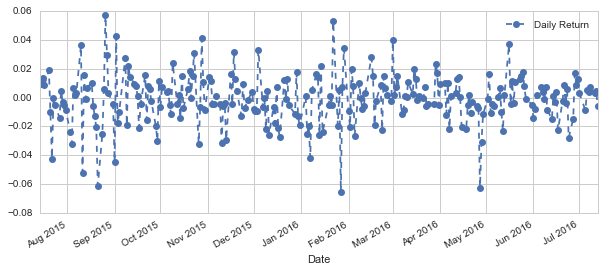

In [13]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(legend=True,figsize=(10,4),linestyle='--',marker='o')

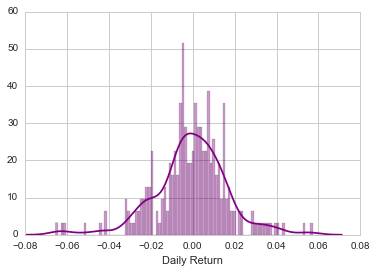

In [14]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

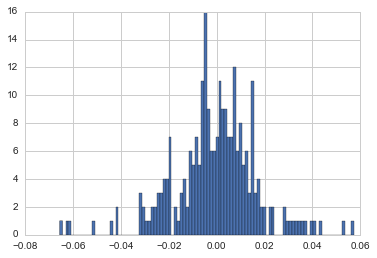

In [15]:
AAPL['Daily Return'].hist(bins=100)

In [23]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [24]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-07-14,123.089612,465.570007,561.099976,44.386331
2015-07-15,124.275333,461.190002,560.219971,44.522544
2015-07-16,125.931417,475.480011,579.849976,45.398208
2015-07-17,127.019145,483.010010,672.929993,45.359288
2015-07-20,129.419998,488.100006,663.020020,45.651175


In [25]:
tech_rets = closing_df.pct_change()

In [26]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-07-14,NaN,NaN,NaN,NaN
2015-07-15,0.009633,-0.009408,-0.001568,0.003069
2015-07-16,0.013326,0.030985,0.035040,0.019668
2015-07-17,0.008637,0.015837,0.160524,-0.000857
2015-07-20,0.018902,0.010538,-0.014727,0.006435


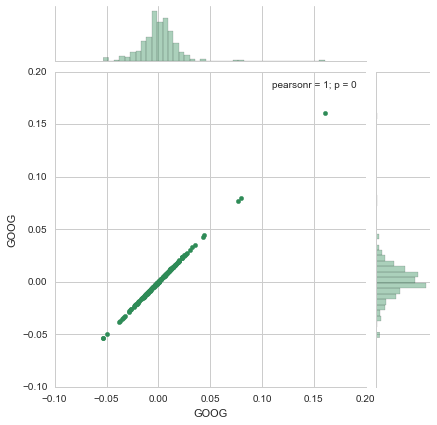

In [27]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

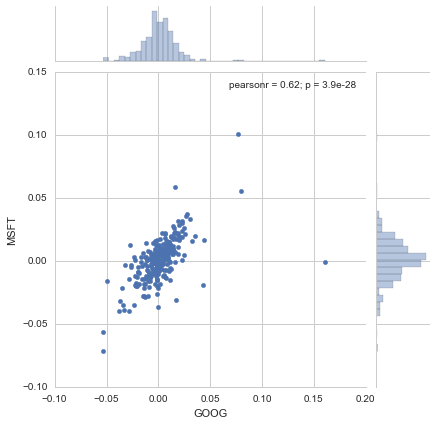

In [34]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

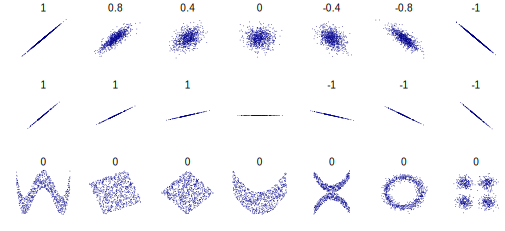

In [29]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

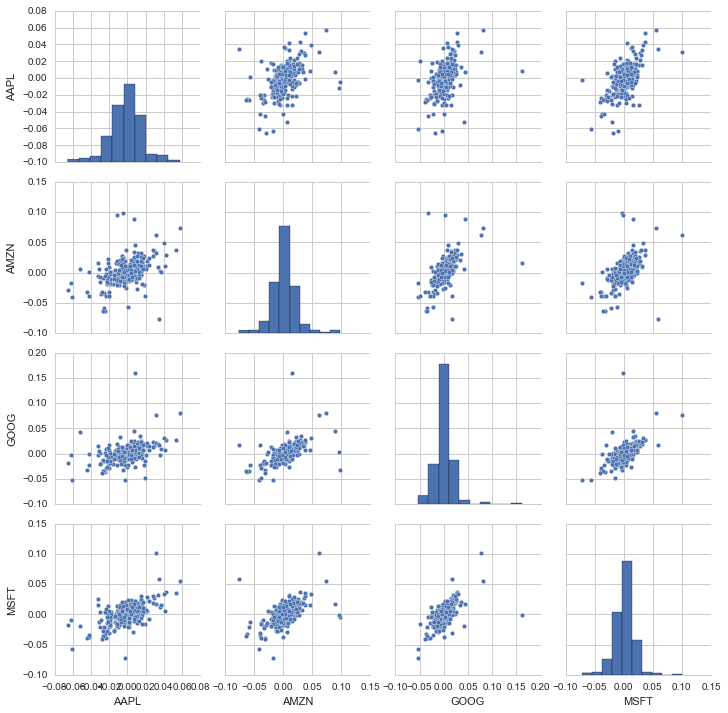

In [30]:
sns.pairplot(tech_rets.dropna())

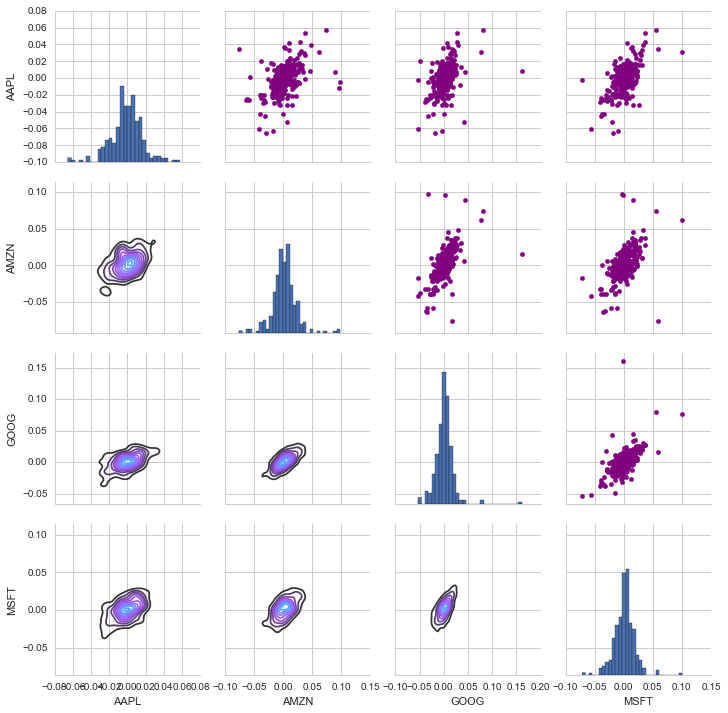

In [35]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

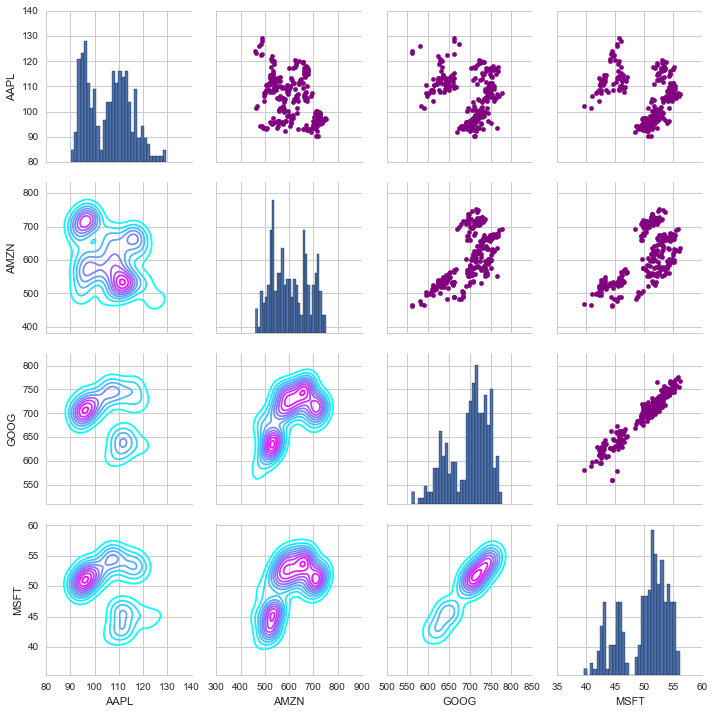

In [36]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool')
returns_fig.map_diag(plt.hist,bins=30)

C:\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


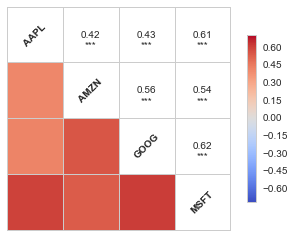

In [39]:
sns.corrplot(tech_rets.dropna(),annot=True)

C:\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


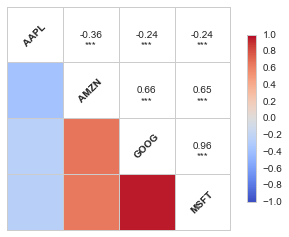

In [40]:
sns.corrplot(closing_df,annot=True)

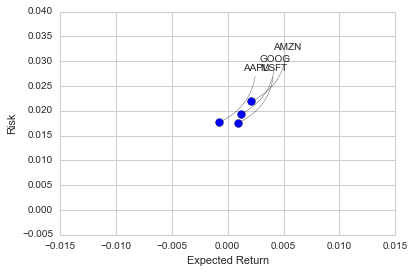

In [41]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

# Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

# Value at risk using the "bootstrap" method

For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

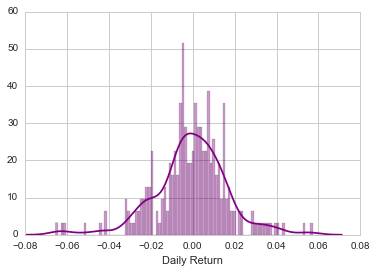

In [42]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [44]:
rets['AAPL'].quantile(0.05)

-0.02859644482707982

The 0.05 empirical quantile of daily returns is at -0.028. That means that with 95% confidence, our worst daily loss will not exceed 2.8%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.028 * 1,000,000 = $28,000.

Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.

#  Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

                                                ΔSS=μΔt+σϵΔt−−−√
                                                ΔSS=μΔt+σϵΔt
Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

ΔS=S(μΔt+σϵΔt−−−√)
ΔS=S(μΔt+σϵΔt)
Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [45]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu(drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [60]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    
    return price
    

In [58]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-07-20,659.239990,668.880005,653.010010,663.020020,5860900,663.020020
2015-07-21,655.210022,673.000000,654.299988,662.299988,3377200,662.299988
2015-07-22,660.890015,678.640015,659.000000,662.099976,3929300,662.099976
2015-07-23,661.270020,663.630005,641.000000,644.280029,3029100,644.280029
2015-07-24,647.000000,648.169983,622.520020,623.559998,3625700,623.559998


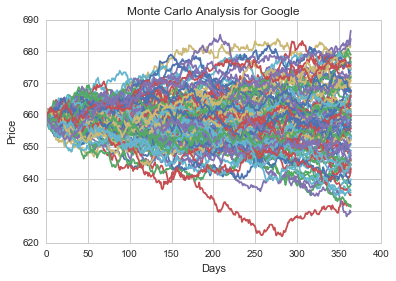

In [61]:
start_price = 659.23

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [62]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

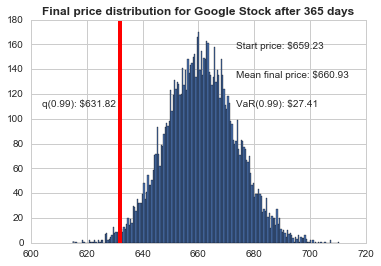

In [63]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8, s ="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7, "Mean final price: $%.2f" %simulations.mean())

plt.figtext(0.6,0.6, "VaR(0.99): $%.2f" %(start_price - q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" %q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title("Final price distribution for Google Stock after %s days" % days, weight='bold')